In [1]:
import sympy as sp
from sympy import sin, cos

sp.init_printing()

In [9]:
theta, phi, l = sp.symbols('theta phi lambda')

In [4]:
sigma_z = sp.Array([[1, 0], [0, 1]])
sigma_x = sp.Array([[0, 1], [1, 0]])
sigma_y = sp.Array([[0, -1j], [1j, 0]])

In [11]:
sp.simplify((cos(theta) - l)*(-cos(theta) - l))

In [13]:
sp.simplify((sin(theta)*cos(phi)-1j*sin(theta)*sin(phi))*(sin(theta)*cos(phi)+1j*sin(theta)*sin(phi)))

solving above gives me expected $\lambda = \pm 1$

In [15]:
x, y = sp.symbols('x y')

In [21]:
[x*(cos(theta)-1) + y*sin(theta)*(cos(phi)-1j*(sin(phi))), 
             x*sin(theta)*(cos(phi)+1j*(sin(phi))) - y*(cos(theta)+1), ]

In [22]:
sp.linsolve([x*(cos(theta)-1) + y*sin(theta)*(cos(phi)-1j*(sin(phi))), 
             x*sin(theta)*(cos(phi)+1j*(sin(phi))) - y*(cos(theta)+1), ], (x, y))

## Exercise 3.3

In [7]:
operator = sp.Matrix([[cos(theta), sin(theta)], [sin(theta), -cos(theta)]])

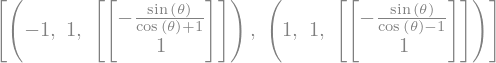

In [8]:
operator.eigenvects()

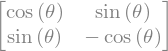

In [9]:
operator

## Exercise 4.6

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
p1 = lambda t: (1+np.sin(t))/2 # = Prob(sigma_y == 1)
p2 = lambda t: (1-np.sin(t))/2 # = Prob(sigma_y == -1)

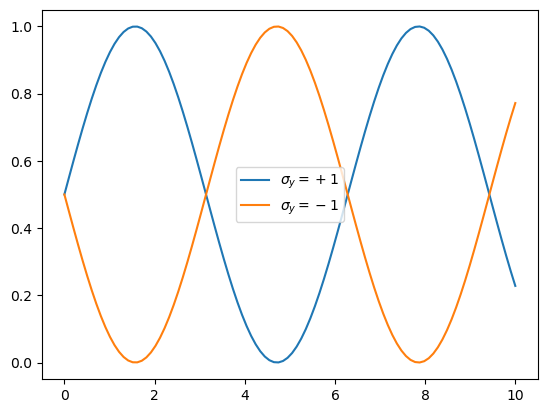

In [6]:
t = np.linspace(0, 10, 100)
plt.plot(t, p1(t), label="$\sigma_y = +1$")
plt.plot(t, p2(t), label="$\sigma_y = -1$")
plt.legend();

In [7]:
q1 = lambda t: (1+np.cos(t))/2 # = Prob(sigma_x == 1)
q2 = lambda t: (1-np.cos(t))/2 # = Prob(sigma_x == -1)

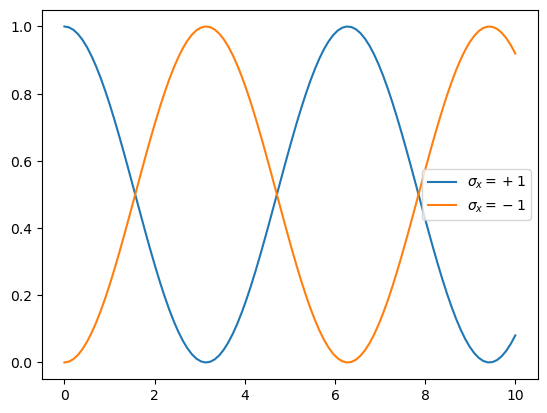

In [8]:
t = np.linspace(0, 10, 100)
plt.plot(t, q1(t), label="$\sigma_x = +1$")
plt.plot(t, q2(t), label="$\sigma_x = -1$")
plt.legend();

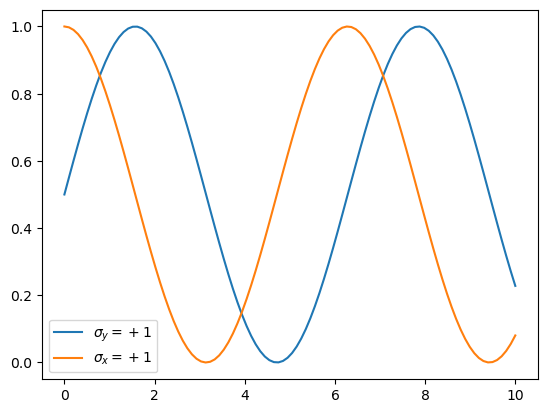

In [10]:
t = np.linspace(0, 10, 100)
plt.plot(t, p1(t), label="$\sigma_y = +1$")
plt.plot(t, q1(t), label="$\sigma_x = +1$")
plt.legend();

## Exercise 7.3

In [2]:
A_symbols = sp.symbols('A_11 A_12 A_21 A_22')
B_symbols = sp.symbols('B_11 B_12 B_21 B_22')
a_symbols = sp.symbols('a_1 a_2')
b_symbols = sp.symbols('b_1 b_2')

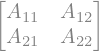

In [6]:
A = sp.Matrix([[A_symbols[0], A_symbols[1]], [A_symbols[2], A_symbols[3]]])
A

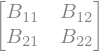

In [7]:
B = sp.Matrix([[B_symbols[0], B_symbols[1]], [B_symbols[2], B_symbols[3]]])
B

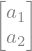

In [8]:
a = sp.Matrix(a_symbols)
a

In [9]:
b = sp.Matrix(b_symbols)
b

In [43]:
def kronecker_prod(l, r):
    w = l.shape[1] * r.shape[1]
    h = l.shape[0] * r.shape[0]
    
    res = [[None for j in range(w)] for i in range(h)]
    
    for m in range(l.shape[0]):
        for n in range(l.shape[1]):
            cell = l[m, n]
            for i in range(r.shape[0]):
                for j in range(r.shape[1]):
                    res[m*l.shape[0] + i][n*l.shape[1] + j] = sp.expand(cell * r[i, j])
    
    return sp.Matrix(res)

In [31]:
Aa = A@a
Bb = B@b

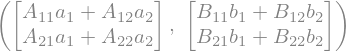

In [32]:
Aa, Bb

In [50]:
rhs = kronecker_prod(Aa, Bb)

In [45]:
p1 = kronecker_prod(A, B)

In [46]:
p2 = kronecker_prod(a, b)

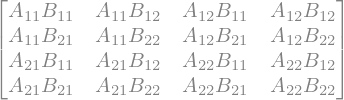

In [47]:
p1

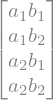

In [48]:
p2

In [51]:
lhs = p1@p2

In [52]:
lhs == rhs

True

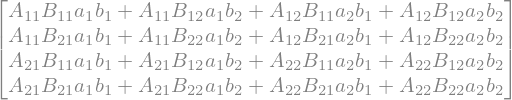

In [53]:
lhs

In [54]:
sp.latex(kronecker_prod(A, B), )

'\\left[\\begin{matrix}A_{11} B_{11} & A_{11} B_{12} & A_{12} B_{11} & A_{12} B_{12}\\\\A_{11} B_{21} & A_{11} B_{22} & A_{12} B_{21} & A_{12} B_{22}\\\\A_{21} B_{11} & A_{21} B_{12} & A_{22} B_{11} & A_{22} B_{12}\\\\A_{21} B_{21} & A_{21} B_{22} & A_{22} B_{21} & A_{22} B_{22}\\end{matrix}\\right]'

## Average of the function and function of the average

### Single Humped \psi(x)

NOTE: Technically, we would have a complex valued wave function, square of which would be used to compute the expectations. However, for the sake of simplicity, I will be plotting real valued function directly. One can think that as $\psi^\ast \psi$.

In [49]:
import ipywidgets as wdg
import matplotlib.pyplot as plt
import numpy as np
import jax
import scipy as sp
from jax import numpy as jnp

In [50]:
%matplotlib widget

In [51]:
x = np.arange(-10, 10)

In [6]:
sigma = wdg.FloatSlider(value=1, min=0.01, max=5, step=.5)
display(sigma)

FloatSlider(value=1.0, max=5.0, min=0.01, step=0.5)

In [4]:
laplace = jax.scipy.stats.laplace.pdf

In [6]:
x = jnp.arange(-10, 10, .1)

In [8]:
v = laplace(x)

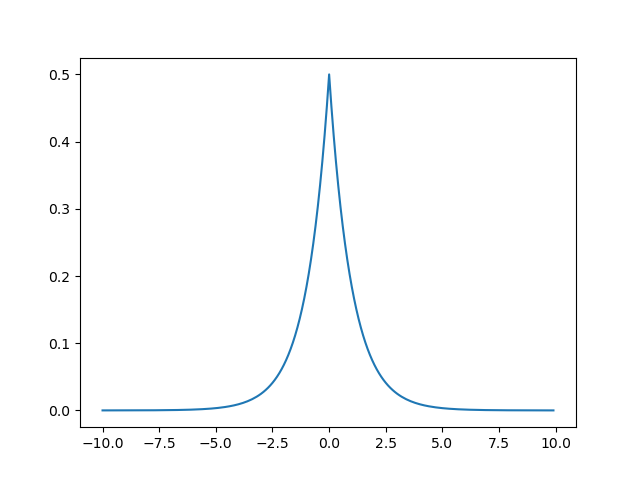

In [9]:
plt.plot(x, v)

In [27]:
f_fn = jax.grad(laplace)
F = jax.vmap(f_fn)
f = F(x)

In [32]:
psi2 = jax.scipy.stats.norm.pdf(x, scale=0.5)

conv = jnp.convolve(f, psi2, mode='same')

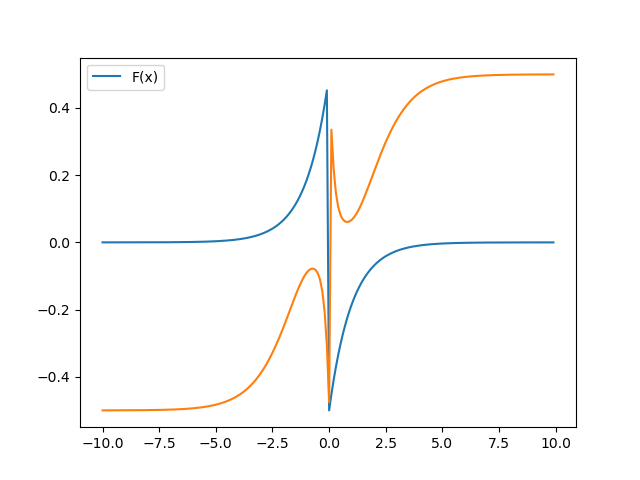

In [33]:
plt.figure()
plt.plot(x, f, label='F(x)')
plt.plot(x, F(conv))
plt.legend()

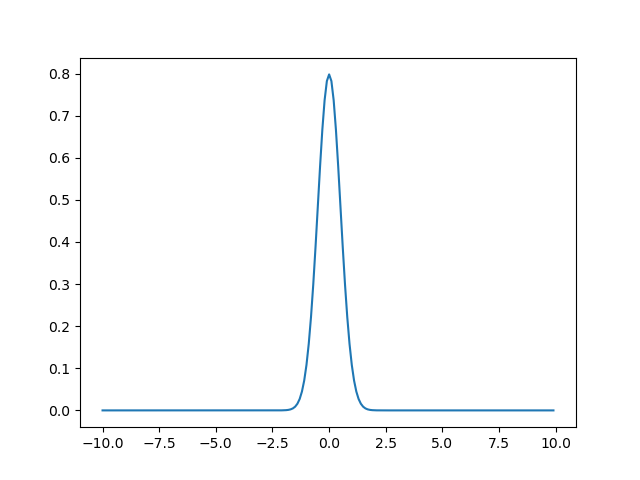

In [22]:
plt.figure()
plt.plot(x, psi_star)

## Fourier Transform


In [5]:
import scipy as sp
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [46]:
x = np.arange(-10, 10, 0.01)
px= stats.norm.pdf(x, loc=0, scale=0.01)

In [47]:
pp = sp.fft.fft(px)/np.sqrt(len(pp))
pp = sp.fft.fftshift(np.abs(pp))

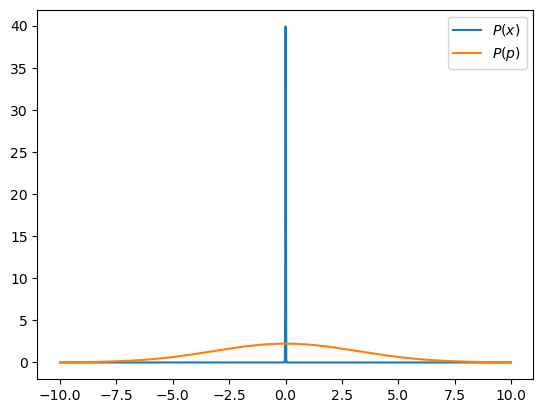

In [48]:
plt.plot(x, px, label='$P(x)$')
plt.plot(x, pp, label='$P(p)$')
plt.legend()